In [5]:
%run -i create_data.py 
%run -i circuito_v7.py
%run -i make_measurements.py
%run -i plot_QFM.py

## Segundo Entrenamiento Circuito 7

### Visualización del mapeo U con parámetros arbitrarios

In [12]:
import torch 
import numpy as np 
params_init = torch.tensor([[[0.3138, 0.8762],
          [0.2068, 0.5950],
          [0.7856, 0.1778]],
 
         [[0.1347, 0.9728],
          [0.4095, 0.6176],
          [0.9898, 0.2445]],
 
         [[0.4007, 0.9476],
          [0.9460, 0.6361],
          [0.6825, 0.0984]]],requires_grad = False)

layers = 2 
qubits = 2 
ansatz = ansatz_v7
 #Visualización del mapeo 
plot_QFM(ansatz, qubits, layers, params_init)

### Visualización del mapeo optimizado U

In [6]:
import torch
ansatz = ansatz_v7 
params = torch.tensor([[[0.1795, 1.2075],
          [0.2436, 0.6249],
          [0.9537, 0.0057]],
 
         [[0.4420, 1.2546],
          [0.0696, 0.6260],
          [0.5053, 0.1152]],
 
         [[0.5471, 0.9513],
          [1.1224, 0.3825],
          [0.5415, 0.2269]]], requires_grad=False)
layers = 2 
qubits = 2 
 #Visualización del mapeo 
plot_QFM(ansatz, qubits, layers, params)

### Creación y justificación de la nueva componente del  circuito (W)


De los gráficos anteriores se concluye que:
1. Para el Qubit 0 se logra empezar a ver una separabilidad a partir de $<z>=0$
2. Para el Qubit 1, con dificultad, una tendencia de los estados cuánticos asociados a la clase verde a tener un valor esperado en $<x>,<y> \to 0$

***OBSERVACIONES:***
1. La nueva componente del circuito, llamada $W$, debe estar parametrizada por los estados cuánticos en las respectivas esferas de Bloch y a lo más, por las clases; opciones:
   1. Aumentar o disminuir la pureza de cada estado (asociado a cada clase)
   2. En cada Qubit, volver a entrelazar, rotar, etcétera...


Para el qubit 0 se podría 

In [23]:
#Intentar añadir más o menos entrelazamiento para aumentar la pureza
import pennylane as qml 

def ansatz_v7_(qubits, layers,params,dato):
    layers = 1
    qubits = 2
    layers_ = 3 
    params_ = torch.tensor([[[0.1795, 1.2075],
          [0.2436, 0.6249],
          [0.9537, 0.0057]],
 
         [[0.4420, 1.2546],
          [0.0696, 0.6260],
          [0.5053, 0.1152]],
 
         [[0.5471, 0.9513],
          [1.1224, 0.3825],
          [0.5415, 0.2269]]], requires_grad=False)
    
    for qubit in range(qubits):
        qml.Hadamard(wires=qubit)
    
    r = torch.linalg.vector_norm(dato)
    for layer in range(layers_):
        
        #CRY Entanglement (via sigmoid)
        for qubit in range(qubits):
            param_rotCRY = params[0][layer][qubit]
            #Entanglement via CRY
            if qubit < qubits-1:
                qml.CRY(phi = torch.pi * torch.sigmoid(r * param_rotCRY), wires = [qubit, qubit+1] )
            else:
                qml.CRY(phi = torch.pi * torch.sigmoid(r * param_rotCRY)  , wires=[qubits-1, 0])
        
        #RY rotations
        for qubit in range(qubits):
            param_RY = params[1][layer][qubit]
            qml.RY(phi = param_RY * r, wires = qubit)
    
        #Parametrized Phase-Shift  
        for qubit in range(qubits):
            param_shift = params[2][layer][qubit]
            qml.PhaseShift(phi=param_shift*pow(dato[qubit],2), wires=qubit)    
            
        #Anañdir Rotaciones con entrelazamiento para analizar la pureza 
        mediciones = make_measurements(ansatz_v7,qubits, layers_, params_, dato)
        qml.CRX(phi = mediciones['qubit0'][1],wires = [0,1])
        qml.CRX(phi = mediciones['qubit1'][1],wires = [1,0])

        
        
    




In [24]:
plot_QFM(ansatz_v7_, qubits, layers, params)

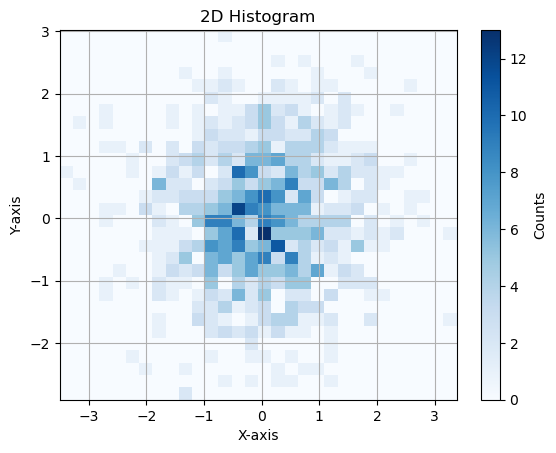

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for demonstration
x = np.random.randn(1000)
y = np.random.randn(1000)

# Create a 2D histogram
plt.hist2d(x, y, bins=(30, 30), cmap=plt.cm.Blues)

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Counts')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Histogram')
plt.grid()

# Show the plot
plt.show()

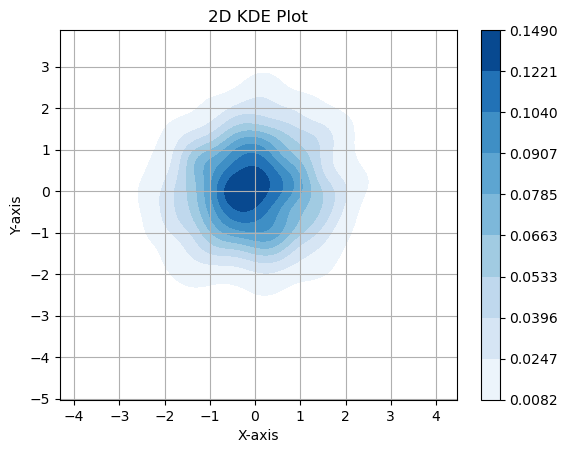

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for demonstration
x = np.random.randn(1000)
y = np.random.randn(1000)

# Create a 2D KDE plot
sns.kdeplot(x=x, y=y, cmap="Blues", fill=True, cbar=True)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D KDE Plot')
plt.grid()

# Show the plot
plt.show()


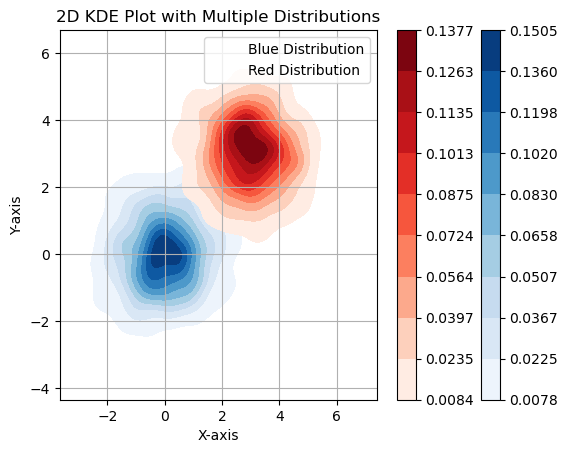

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figsize = (4,10)

# Generate random data for the blue distribution
x_blue = np.random.randn(1000)
y_blue = np.random.randn(1000)

# Generate random data for the red distribution
x_red = np.random.normal(loc=3, scale=1, size=1000)
y_red = np.random.normal(loc=3, scale=1, size=1000)

# Create a 2D KDE plot for the blue distribution
sns.kdeplot(x=x_blue, y=y_blue, cmap="Blues", fill=True, cbar=True, label='Blue Distribution')

# Create a 2D KDE plot for the red distribution
sns.kdeplot(x=x_red, y=y_red, cmap="Reds", fill=True, cbar=True, label='Red Distribution')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D KDE Plot with Multiple Distributions')
plt.grid()
# Show legend
plt.legend()

# Show the plot
plt.show()


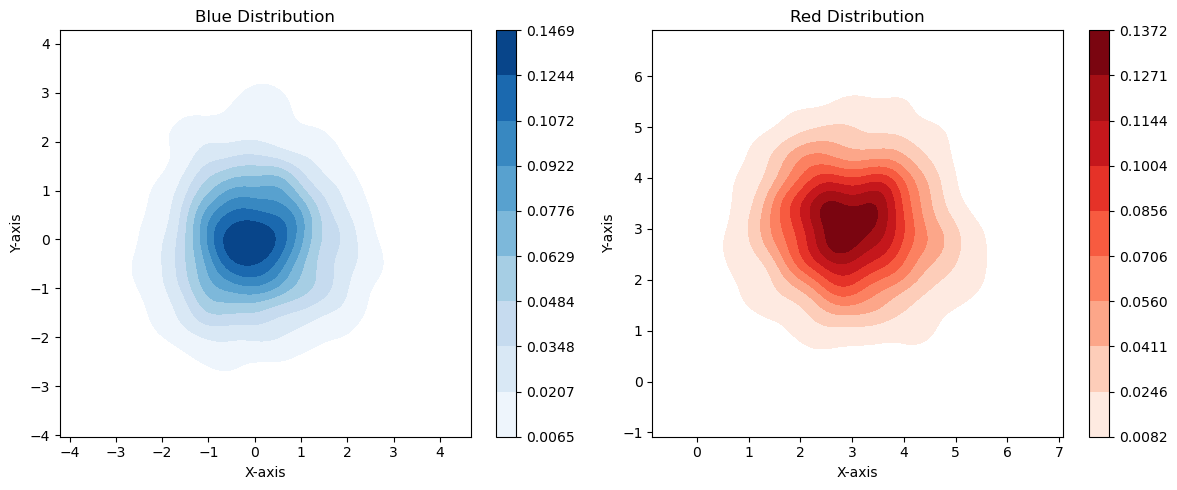

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for two distributions
x_blue = np.random.randn(1000)
y_blue = np.random.randn(1000)

x_red = np.random.normal(loc=3, scale=1, size=1000)
y_red = np.random.normal(loc=3, scale=1, size=1000)

# Set up a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust the figure size as needed

# Create 2D KDE plot for the blue distribution
sns.kdeplot(x=x_blue, y=y_blue, cmap="Blues", fill=True, cbar=True, ax=axes[0])
axes[0].set_title('Blue Distribution')

# Create 2D KDE plot for the red distribution
sns.kdeplot(x=x_red, y=y_red, cmap="Reds", fill=True, cbar=True, ax=axes[1])
axes[1].set_title('Red Distribution')

# Set common labels
for ax in axes:
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


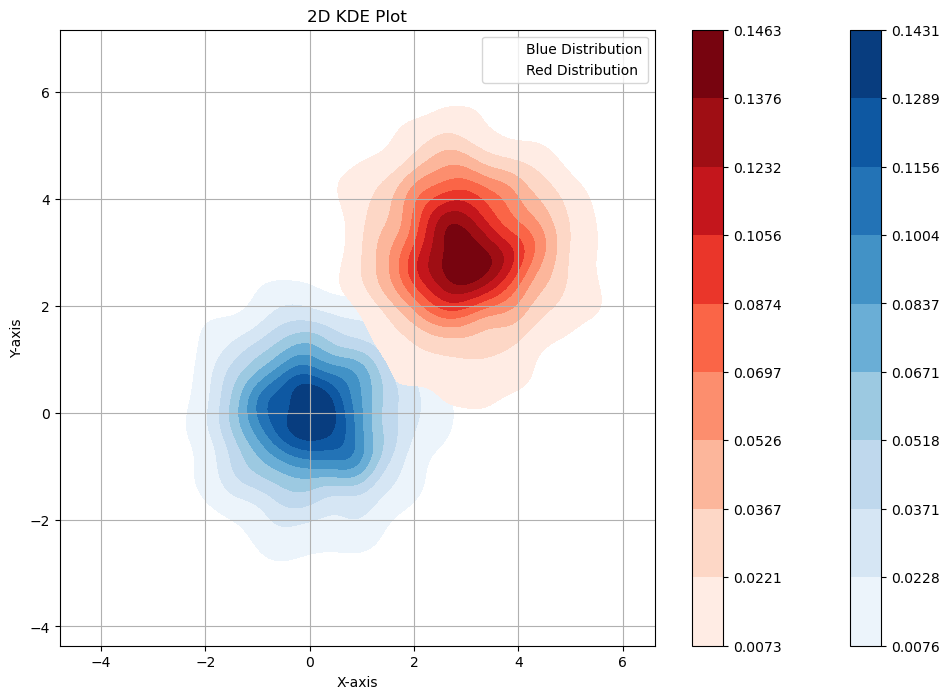

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for demonstration
x1 = np.random.randn(1000)
y1 = np.random.randn(1000)

x2 = np.random.normal(loc=3, scale=1, size=1000)
y2 = np.random.normal(loc=3, scale=1, size=1000)

plt.figure(figsize=(12, 8))


# Create a 2D KDE plot for the first distribution (blue)
sns.kdeplot(x=x1, y=y1, cmap="Blues", fill=True, cbar=True, label='Blue Distribution')

# Create a 2D KDE plot for the second distribution (red)
sns.kdeplot(x=x2, y=y2, cmap="Reds", fill=True, cbar=True, label='Red Distribution')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D KDE Plot')

# Set the size of the plot

# Show the legend
plt.legend()
plt.grid()

# Show the plot
plt.show()


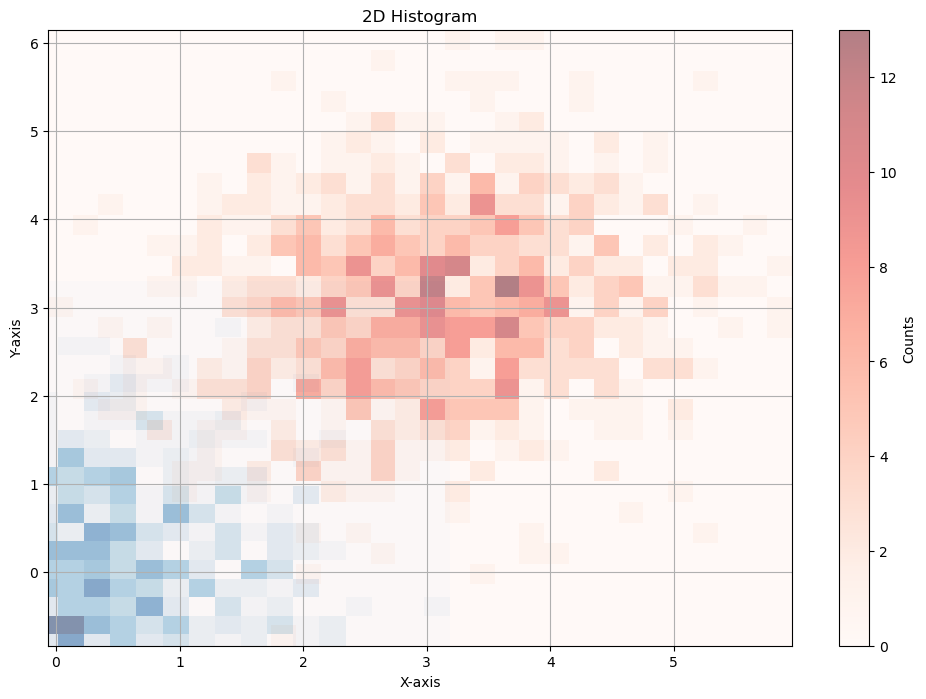

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for demonstration
x1 = np.random.randn(1000)
y1 = np.random.randn(1000)

x2 = np.random.normal(loc=3, scale=1, size=1000)
y2 = np.random.normal(loc=3, scale=1, size=1000)

# Create a 2D histogram for the first distribution (blue)
plt.figure(figsize=(12, 8))


plt.hist2d(x1, y1, bins=(30, 30), cmap='Blues')

# Create a 2D histogram for the second distribution (red)
plt.hist2d(x2, y2, bins=(30, 30), cmap='Reds', alpha=0.5)  # Using alpha for transparency

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Histogram')
plt.grid()

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Counts')

# Show the plot
plt.show()

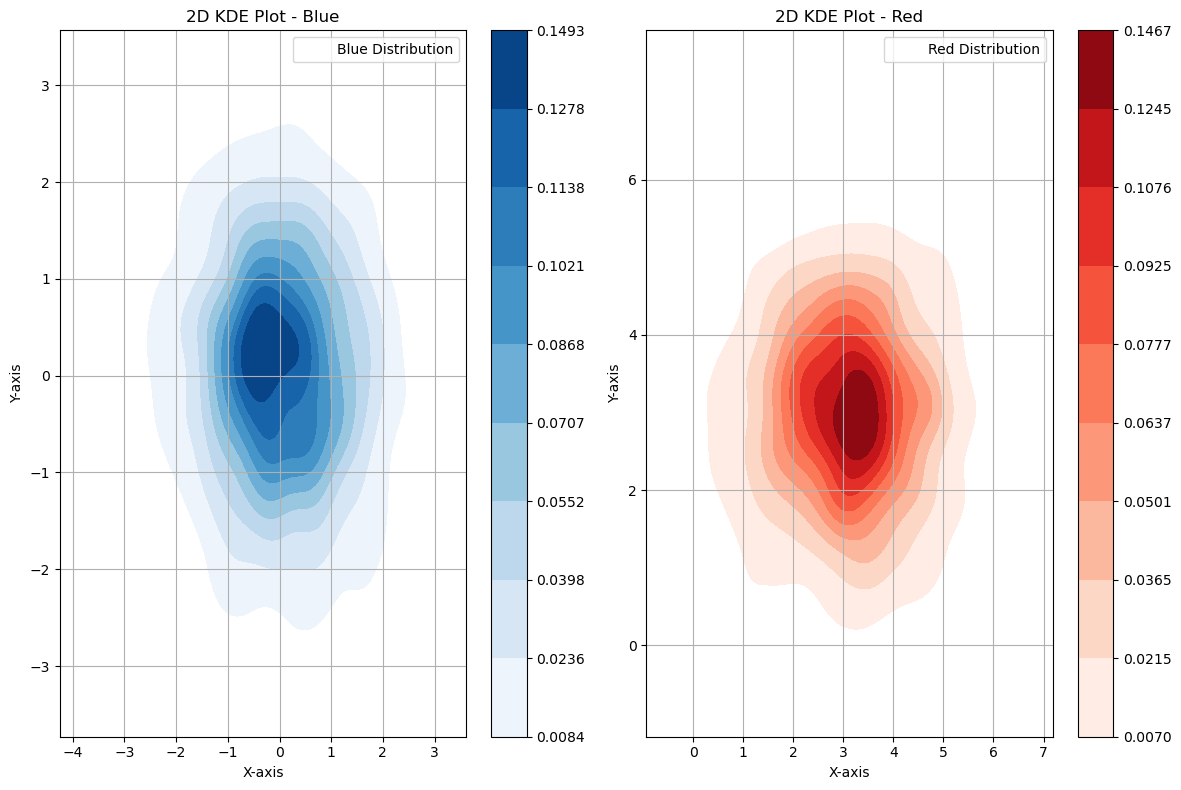

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for demonstration
x1 = np.random.randn(1000)
y1 = np.random.randn(1000)

x2 = np.random.normal(loc=3, scale=1, size=1000)
y2 = np.random.normal(loc=3, scale=1, size=1000)

# Create a 2D KDE plot for the first distribution (blue)
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
sns.kdeplot(x=x1, y=y1, cmap="Blues", fill=True, cbar=True, label='Blue Distribution')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D KDE Plot - Blue')

# Show the legend
plt.legend()
plt.grid()

# Create a 2D KDE plot for the second distribution (red)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.kdeplot(x=x2, y=y2, cmap="Reds", fill=True, cbar=True, label='Red Distribution')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D KDE Plot - Red')

# Show the legend
plt.legend()
plt.grid()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


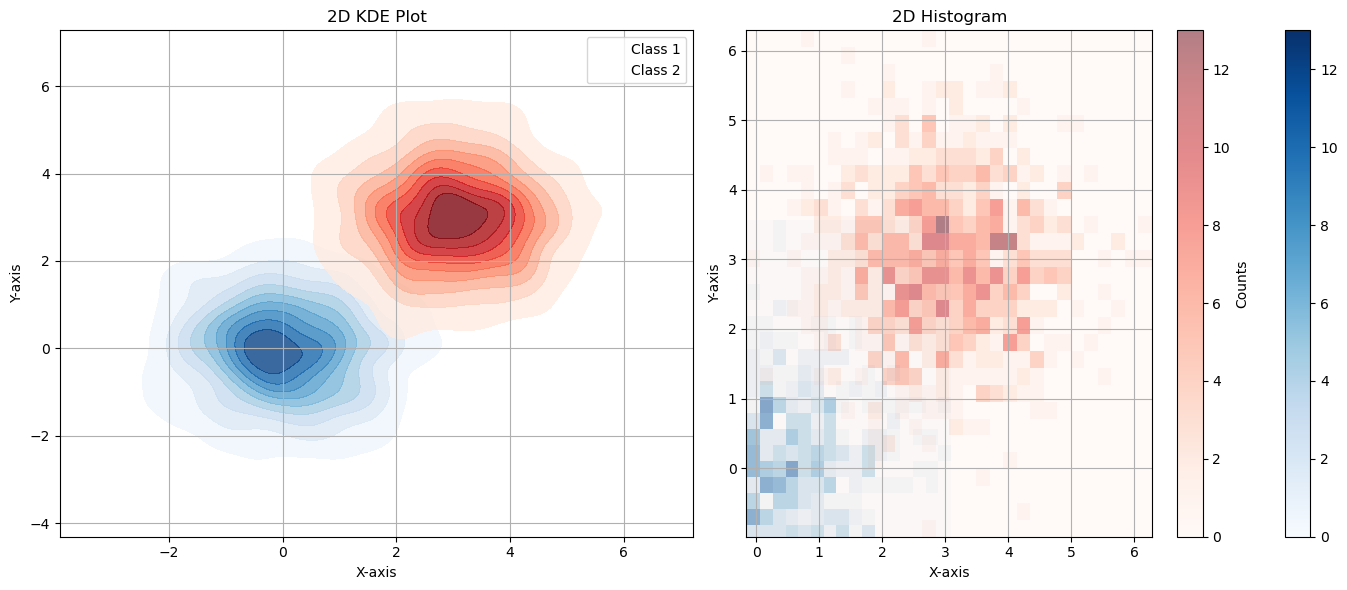

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for demonstration
x1 = np.random.randn(1000)
y1 = np.random.randn(1000)

x2 = np.random.normal(loc=3, scale=1, size=1000)
y2 = np.random.normal(loc=3, scale=1, size=1000)

# Set up a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create a 2D KDE plot for the first distribution (blue)
sns.kdeplot(x=x1, y=y1, cmap="Blues", fill=True,  label='Class 1', ax=axes[0], alpha = 0.8)

# Create a 2D KDE plot for the second distribution (red)
sns.kdeplot(x=x2, y=y2, cmap="Reds", fill=True,  label='Class 2', ax=axes[0], alpha = 0.8)

# Set labels and title for the KDE plot
axes[0].set_xlabel('X-axis')
axes[0].set_ylabel('Y-axis')
axes[0].set_title('2D KDE Plot')
axes[0].legend()
axes[0].grid()

# Create a 2D histogram for the first distribution (blue)
hist1 = axes[1].hist2d(x1, y1, bins=(30, 30), cmap='Blues')

# Create a 2D histogram for the second distribution (red)
hist2 = axes[1].hist2d(x2, y2, bins=(30, 30), cmap='Reds', alpha=0.5)  # Using alpha for transparency

# Set labels and title for the histogram
axes[1].set_xlabel('X-axis')
axes[1].set_ylabel('Y-axis')
axes[1].set_title('2D Histogram')
axes[1].grid()

# Add a colorbar for the histogram
cbar = plt.colorbar(hist1[3], ax=axes[1])
cbar = plt.colorbar(hist2[3], ax=axes[1])
cbar.set_label('Counts')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [1]:
%%writefile plot_kde_hist.py

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_2d_distributions(states, observable_1, observable_2, qubit):
    # Set up a 1x2 grid for subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    x1 = states['label1'][qubit][observable_1]
    y1 = states['label1'][qubit][observable_2]
    
    x2 = states['label2'][qubit][observable_1]
    y2 = states['label2'][qubit][observable_2]


    # Create a 2D KDE plot for the first distribution (blue)
    sns.kdeplot(x=x1, y=y1, cmap="Blues", fill=True, label='Label 1', ax=axes[0], alpha=0.8)

    # Create a 2D KDE plot for the second distribution (red)
    sns.kdeplot(x=x2, y=y2, cmap="Greens", fill=True, label='Label 2', ax=axes[0], alpha=0.8)

    # Set labels and title for the KDE plot
    axes[0].set_xlabel(exp_observable_1)
    axes[0].set_ylabel(exp_observable_2)
    axes[0].set_title(f'2D KDE Plot, qubit {qubit}')
    axes[0].legend()
    axes[0].grid()

    # Create a 2D histogram for the first distribution (blue)
    hist1 = axes[1].hist2d(x1, y1, bins=(30, 30), cmap='Blues')

    # Create a 2D histogram for the second distribution (red)
    hist2 = axes[1].hist2d(x2, y2, bins=(30, 30), cmap='Greens', alpha=0.5)  # Using alpha for transparency

    # Set labels and title for the histogram
    axes[1].set_xlabel(exp_observable_1)
    axes[1].set_ylabel(exp_observable_2)
    axes[1].set_title(f'2D Histogram, qubit {qubit}')
    axes[1].grid()

    # Add a colorbar for the histogram
    cbar1 = plt.colorbar(hist1[3], ax=axes[1], label='Counts - Class 1')
    cbar2 = plt.colorbar(hist2[3], ax=axes[1], label='Counts - Class 2')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()


Overwriting plot_kde_hist.py
